In [7]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [8]:
train_d = '/content/drive/MyDrive/Brain/Train'
test_d = '/content/drive/MyDrive/Brain/Test'

In [9]:
batch_size = 64
img_height = 224
img_size=224

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_d,
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=(img_size,img_size),
  batch_size=batch_size,color_mode='grayscale')

Found 2720 files belonging to 2 classes.
Using 2040 files for training.


In [10]:
test_ds= tf.keras.utils.image_dataset_from_directory(
  test_d,
  seed=123,
  image_size=(img_size,img_size),color_mode='grayscale',batch_size=488)

Found 488 files belonging to 2 classes.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_d,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(img_size,img_size),
  batch_size=batch_size,color_mode='grayscale')

Found 2720 files belonging to 2 classes.
Using 680 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['no', 'yes']


In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 224, 224, 1)
(64,)


In [14]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 1),kernel_regularizer=regularizers.L2(1e-06),
    bias_regularizer=regularizers.L2(1e-06),
    activity_regularizer=regularizers.L2(1e-06)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_regularizer=regularizers.L2(1e-06),
    bias_regularizer=regularizers.L2(1e-06),
    activity_regularizer=regularizers.L2(1e-06)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',kernel_regularizer=regularizers.L2(1e-06),
    bias_regularizer=regularizers.L2(1e-06),
    activity_regularizer=regularizers.L2(1e-06)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=regularizers.L2(1e-06),
    bias_regularizer=regularizers.L2(1e-06),
    activity_regularizer=regularizers.L2(1e-06)), 
    tf.keras.layers.BatchNormalization(),    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [16]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=1e-5)
model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy (from_logits=False), metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("model_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=3, verbose=1, mode='auto')

cb = checkpoint

In [17]:
history = model.fit(train_ds,epochs=10, validation_data=val_ds, callbacks = cb)

Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 270.1494 - accuracy: 0.8172
Epoch 1: val_accuracy improved from -inf to 0.80735, saving model to model_1.h5
32/32 [==============================] - 398s 12s/step - loss: 270.1494 - accuracy: 0.8172 - val_loss: 266.9534 - val_accuracy: 0.8074
Epoch 2/10
32/32 [==============================] - ETA: 0s - loss: 261.7677 - accuracy: 0.9181
Epoch 2: val_accuracy improved from 0.80735 to 0.88529, saving model to model_1.h5
32/32 [==============================] - 6s 178ms/step - loss: 261.7677 - accuracy: 0.9181 - val_loss: 258.7345 - val_accuracy: 0.8853
Epoch 3/10
32/32 [==============================] - ETA: 0s - loss: 254.1181 - accuracy: 0.9505
Epoch 3: val_accuracy improved from 0.88529 to 0.90000, saving model to model_1.h5
32/32 [==============================] - 7s 183ms/step - loss: 254.1181 - accuracy: 0.9505 - val_loss: 251.3877 - val_accuracy: 0.9000
Epoch 4/10
32/32 [==============================] - ETA: 0s -

In [18]:
predictions = np.array([])
labels =  np.array([])
i=0;
for x, y in test_ds:
    i+=1
    z=model.predict(x)
    xx = np.round(z)
    prediction=np.concatenate([predictions,xx[:,-1]])
    labels = np.concatenate([labels, y.numpy()])

In [19]:
evaluation = model.evaluate(test_ds, return_dict=True)

1/1 [==============================] - 2s 2s/step - loss: 178.5618 - accuracy: 0.9488


In [20]:
import sklearn
print(sklearn.metrics.classification_report(prediction,labels))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95       232
         1.0       0.98      0.93      0.95       256

    accuracy                           0.95       488
   macro avg       0.95      0.95      0.95       488
weighted avg       0.95      0.95      0.95       488



In [21]:
labels

array([0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0.

In [22]:
prediction

array([0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0.

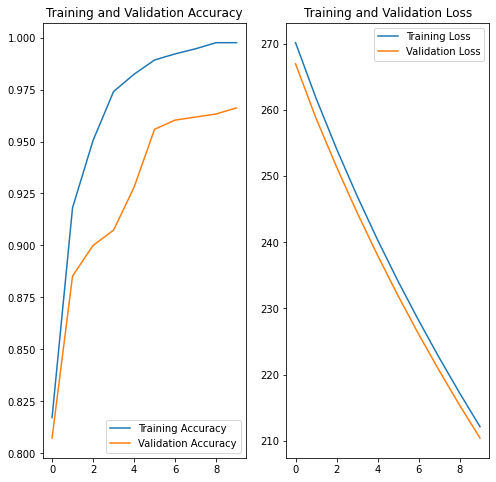

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

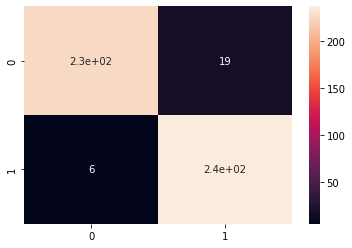

In [24]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(labels,prediction)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)